# 실습 순서
1. 생존자를 찾는 규칙을 만든다
2. 작성한 규칙을 이용해서 생존자를 판별한다
3. 규칙의 정확도를 분석한다

In [1]:
# 타이타닉호의 생존자 데이터 표본

import os
os.chdir('./ddata/titanic')
os.getcwd()

'/Users/billy/py/ddata/titanic'

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

- Pclass : 좌석 클래스 1,2,3
- Survived : 생존 여부
- SibSp : 함께 탑승한 형제 또는 배우자의 수
- Parch : 함께 탑승한 부모 또는 자녀의 수
- Ticket : 티켓 번호
- Fare : 티켓 요금
- Cabin : 선실 번호
- Embarked : 탑승한 곳 C(Cherbourg), Q(Queenstown), S(Southampton)

In [3]:
pd.read_csv('train.csv', index_col=0).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [6]:
train_data.info()

## Pclass -> one-hot
## Cabin ??
## Embarked -> one-hot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#  결측치 비율로 따지기

train_data.isnull().sum() / len(train_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# 기술적 통계값은 명목변수는 계산되지 않는다

train_data.describe().iloc[:,1:]

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## EDA(Exploratory Data Analysis)

In [16]:
df = pd.DataFrame(train_data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
survival = df['Survived'].value_counts()
survival

0    549
1    342
Name: Survived, dtype: int64

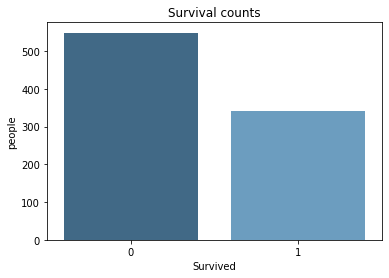

In [18]:
sb.barplot(x = survival.index, y = survival.values, palette="Blues_d")
plt.title('Survival counts')
plt.xlabel('Survived')
plt.ylabel('people')
plt.show()

In [19]:
pclass = df['Pclass'].value_counts()
pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

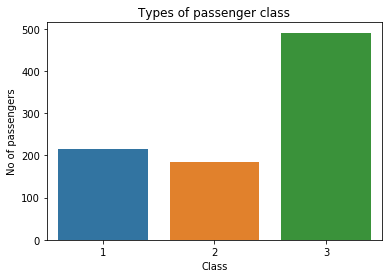

In [20]:
sb.barplot(x = pclass.index, y = pclass.values)
plt.title('Types of passenger class')
plt.xlabel('Class')
plt.ylabel('No of passengers')
plt.show()

## 3등석의 비율이 높다 (이코노미 클래스)

In [21]:
sex = df['Sex'].value_counts()

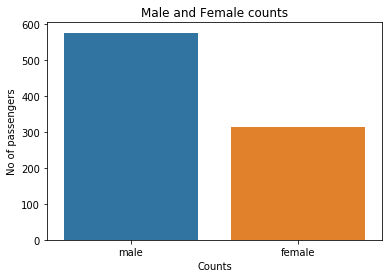

In [22]:
sb.barplot(x = sex.index, y = sex.values)
plt.title('Male and Female counts')
plt.xlabel('Counts')
plt.ylabel('No of passengers')
plt.show()

## 남성의 비율이 더 높다

In [23]:
gender = pd.crosstab(df['Survived'], df['Sex'])
gender

Sex,female,male
Survived,,
0,81,468
1,233,109


In [24]:
type(gender)
gender.loc[1] / gender.sum()

Sex
female    0.742038
male      0.188908
dtype: float64

1. 여성의 생존율은 74.2%이고 남성의 생존율은 18.9%이다

In [25]:
embarked = df['Embarked'].value_counts()
embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

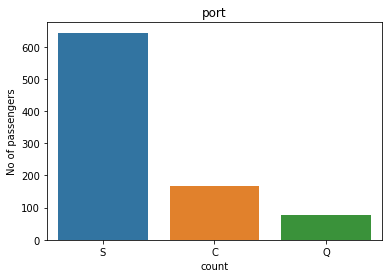

In [26]:
sb.barplot(x=embarked.index, y=embarked.values)
plt.title('port')
plt.xlabel('count')
plt.ylabel('No of passengers')
plt.show()

## 승선자의 대부분은 사우샘프턴 항구에서 탑승했다

In [27]:
port = pd.crosstab(df['Survived'], df['Embarked'])
port

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [28]:
port.loc[1] / port.sum()

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

2. 칼스버그 항구에서 탑승한 승객의 55%는 살았지만 나머지는 39% 이하로 생존했다

In [29]:
location = pd.crosstab(df['Embarked'], df['Pclass'])
location

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [30]:
location.columns.values

array([1, 2, 3])

In [31]:
location[1] / location[1].sum()

Embarked
C    0.397196
Q    0.009346
S    0.593458
Name: 1, dtype: float64

In [32]:
for i in location.columns.values:
    per = location[i] / location[i].sum()
    print(f"{i}등석 탑승객 중 탑승지 비율입니다")
    print(per)

1등석 탑승객 중 탑승지 비율입니다
Embarked
C    0.397196
Q    0.009346
S    0.593458
Name: 1, dtype: float64
2등석 탑승객 중 탑승지 비율입니다
Embarked
C    0.092391
Q    0.016304
S    0.891304
Name: 2, dtype: float64
3등석 탑승객 중 탑승지 비율입니다
Embarked
C    0.134420
Q    0.146640
S    0.718941
Name: 3, dtype: float64


In [33]:
location.iloc[0] / location.iloc[0].sum()

Pclass
1    0.505952
2    0.101190
3    0.392857
Name: C, dtype: float64

3. 1등석의 40%는 칼스버그에서 탑승, 2등석의 9%만 칼스버그에서 탑승, 3등석의 13%만 칼스버그에서 탑승
4. 칼스버그 탑승객의 50%는 1등석 좌석

In [34]:
sibsp = df['SibSp'].value_counts()
sibsp

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

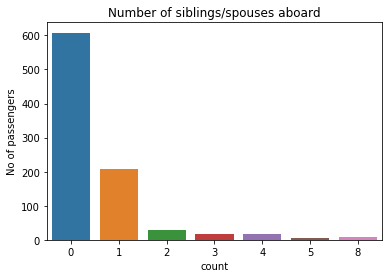

In [35]:
sb.barplot(x = sibsp.index, y = sibsp.values)
plt.title('Number of siblings/spouses aboard')
plt.xlabel('count')
plt.ylabel('No of passengers')
plt.show()

In [36]:
parch = df['Parch'].value_counts()
parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

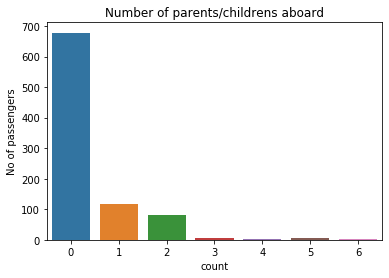

In [37]:
sb.barplot(parch.index, parch.values)
plt.title('Number of parents/childrens aboard')
plt.xlabel('count')
plt.ylabel('No of passengers')
plt.show()

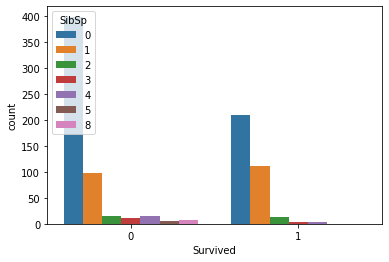

In [38]:
sb.countplot(x = df['Survived'], hue = df['SibSp'])

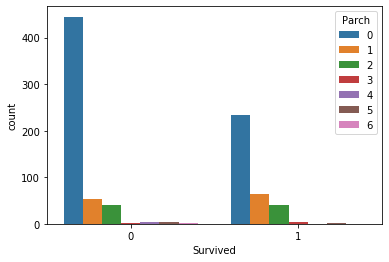

In [39]:
sb.countplot(x = df['Survived'], hue = df['Parch'])

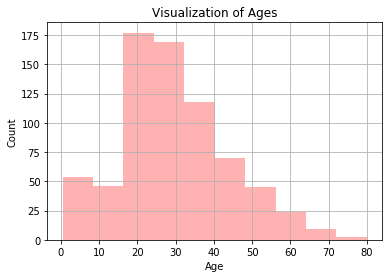

In [40]:
ax = df['Age'].hist(color = 'red', alpha=0.3)
ax.set(xlabel = 'Age',ylabel = 'Count',title = 'Visualization of Ages')
plt.show()

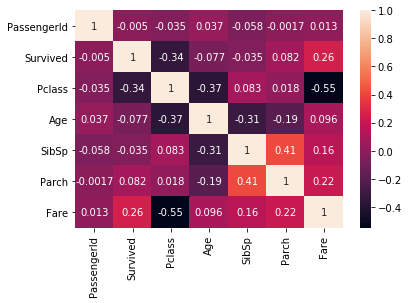

In [41]:
sb.heatmap(df.corr(), annot = True)

## annot는 수치 포함

# 데이터 전처리

In [42]:
delete = ['Ticket', 'Cabin', 'Name', 'Fare']

In [43]:
train = train_data.drop(delete, axis=1)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [45]:
test = test_data.drop(delete, axis=1)

In [46]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


In [47]:
enc = LabelEncoder()          # sklearn.preprocessing

In [48]:
train['Sex'] = enc.fit_transform(train['Sex'])

In [49]:
# 결측치 행 삭제

train = train[train['Embarked'].isnull() == 0]

In [50]:
train['Embarked'] = enc.fit_transform(train['Embarked'])

In [51]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
5,6,0,3,1,NaN,0,0,1
6,7,0,1,1,54.0,0,0,2
7,8,0,3,1,2.0,3,1,2
8,9,1,3,0,27.0,0,2,2
9,10,1,2,0,14.0,1,0,0


In [52]:
# 나이 결측치 처리 [훈련 데이터]
age_median = train['Age'].median()

train.fillna(train['Age'].median(), inplace=True)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Embarked     889 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 62.5 KB


In [54]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [55]:
# 나이 결측치 처리 [테스트 데이터]

test.fillna(train['Age'].median(),inplace = True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [56]:
test['Sex'] = enc.fit_transform(test['Sex'])

In [57]:
test['Embarked'] = enc.fit_transform(test['Embarked'])

In [58]:
test.set_index(['PassengerId'], inplace = True)

In [59]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,1,34.5,0,0,1
893,3,0,47.0,1,0,2
894,2,1,62.0,0,0,1
895,3,1,27.0,0,0,2
896,3,0,22.0,1,1,2


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 22.9 KB


In [61]:
train.set_index(['PassengerId'], inplace=True)

In [62]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,2
2,1,1,0,38.0,1,0,0
3,1,3,0,26.0,0,0,2
4,1,1,0,35.0,1,0,2
5,0,3,1,35.0,0,0,2


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 55.6 KB


In [64]:
pre_data = pd.read_csv('pre_data01.csv')

In [65]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    11 non-null     int64  
 1   name      11 non-null     object 
 2   sex       11 non-null     object 
 3   age       8 non-null      float64
 4   sibsp     11 non-null     int64  
 5   parch     11 non-null     int64  
 6   ticket    11 non-null     object 
 7   fare      11 non-null     float64
 8   cabin     3 non-null      object 
 9   embarked  11 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1008.0+ bytes


In [66]:
delete_n = []

for i in delete:
    delete_n.append(i.lower())

print(delete_n)

['ticket', 'cabin', 'name', 'fare']


In [67]:
pre_data = pre_data.drop(delete_n, axis=1)

In [68]:
pre_data

,pclass,sex,age,sibsp,parch,embarked
0,3,male,18.0,1,1,S
1,1,female,39.0,1,1,C
2,3,male,6.0,0,1,S
3,1,male,35.0,0,0,C
4,3,male,NaN,0,0,C
5,2,female,48.0,1,2,S
6,3,male,NaN,0,0,C
7,3,male,47.0,0,0,S
8,1,female,50.0,0,0,C
9,3,female,NaN,3,1,S


In [69]:
pre_data.fillna(age_median, inplace=True)

In [70]:
pre_data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [71]:
pre_data['sex'] = enc.fit_transform(pre_data['sex'])

In [72]:
#pre_data['embarked'] = enc.fit_transform(pre_data['embarked'])

In [73]:
pre_data.head(10)

,pclass,sex,age,sibsp,parch,embarked
0,3,1,18.0,1,1,S
1,1,0,39.0,1,1,C
2,3,1,6.0,0,1,S
3,1,1,35.0,0,0,C
4,3,1,28.0,0,0,C
5,2,0,48.0,1,2,S
6,3,1,28.0,0,0,C
7,3,1,47.0,0,0,S
8,1,0,50.0,0,0,C
9,3,0,28.0,3,1,S


In [74]:
pre_data.embarked
pre_data.embarked.loc[0]

'S'

In [75]:
## 데이터 일치 수정
pre_data['embarked'] = [0,1,0,1,1,0,1,0,1,0,2]

In [76]:
pre_data

,pclass,sex,age,sibsp,parch,embarked
0,3,1,18.0,1,1,0
1,1,0,39.0,1,1,1
2,3,1,6.0,0,1,0
3,1,1,35.0,0,0,1
4,3,1,28.0,0,0,1
5,2,0,48.0,1,2,0
6,3,1,28.0,0,0,1
7,3,1,47.0,0,0,0
8,1,0,50.0,0,0,1
9,3,0,28.0,3,1,0


## 원핫 인코딩 [데이터 프레임]

In [77]:
df_sex = pd.get_dummies(train['Sex'])
df_sex.columns = ['female', 'male']
df_sex

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [78]:
df_embarked = pd.get_dummies(train['Embarked'])
df_embarked.columns = ['C','Q','S']
df_embarked

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [79]:
df_pclass = pd.get_dummies(train['Pclass'])
df_pclass.columns = ['c_1','c_2','c_3']
df_pclass

,c_1,c_2,c_3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,1,0
888,1,0,0
889,0,0,1


In [80]:
train['female'] = df_sex['female']
train['male'] = df_sex['male']
train['C'] = df_embarked['C']
train['Q'] = df_embarked['Q']
train['S'] = df_embarked['S']
train['c_1'] = df_pclass['c_1']
train['c_2'] = df_pclass['c_2']
train['c_3'] = df_pclass['c_3']

In [81]:
train.drop(['Pclass','Sex','Embarked'], axis=1, inplace=True)

In [82]:
train.head()

,Survived,Age,SibSp,Parch,female,male,C,Q,S,c_1,c_2,c_3
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,0,1,0,0,1,0,0,1
2,1,38.0,1,0,1,0,1,0,0,1,0,0
3,1,26.0,0,0,1,0,0,0,1,0,0,1
4,1,35.0,1,0,1,0,0,0,1,1,0,0
5,0,35.0,0,0,0,1,0,0,1,0,0,1


## standardization

In [84]:
arr = np.array(train)

In [85]:
arr[0]

array([ 0., 22.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.])

In [86]:
X_data = arr[:,1:]

In [87]:
y_data = arr[:,0:1]

In [88]:
X_data.shape

(889, 11)

In [89]:
y_data.shape

(889, 1)

In [90]:
std_scaler = StandardScaler()           # sklearn.preprocessing

In [91]:
fitted = std_scaler.fit(X_data)
std_scaler.fit(X_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
print(fitted.mean_)

[29.31515186  0.52418448  0.38245219  0.35095613  0.64904387  0.18897638
  0.08661417  0.72440945  0.24071991  0.20697413  0.55230596]


In [93]:
X_data_scaler = std_scaler.transform(X_data)

In [94]:
X_data_scaler

array([[-0.56367407,  0.43135024, -0.47432585, ..., -0.56306042,
        -0.51087465,  0.90032807],
       [ 0.66921696,  0.43135024, -0.47432585, ...,  1.77600834,
        -0.51087465, -1.11070624],
       [-0.25545131, -0.47519908, -0.47432585, ..., -0.56306042,
        -0.51087465,  0.90032807],
       ...,
       [-0.10133993,  0.43135024,  2.00611934, ..., -0.56306042,
        -0.51087465,  0.90032807],
       [-0.25545131, -0.47519908, -0.47432585, ...,  1.77600834,
        -0.51087465, -1.11070624],
       [ 0.20688282, -0.47519908, -0.47432585, ..., -0.56306042,
        -0.51087465,  0.90032807]])

In [96]:
y_data[0:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]])

# 모델 학습

In [98]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [99]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [100]:
model.fit(X_data_scaler, y_data, epochs=50, batch_size=1, verbose=1)


Epoch 1/50
889/889 [==============================] - 2s 2ms/step - loss: 0.5361 - accuracy: 0.7492
Epoch 2/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.8133
Epoch 3/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8245
Epoch 4/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8245
Epoch 5/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8256
Epoch 6/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4042 - accuracy: 0.8290
Epoch 7/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4017 - accuracy: 0.8369
Epoch 8/50
889/889 [==============================] - 1s 1ms/step - loss: 0.4032 - accuracy: 0.8290
Epoch 9/50
889/889 [==============================] - 1s 1ms/step - loss: 0.3966 - accuracy: 0.8346
Epoch 10/50
889/889 [==============================] - 1s 1ms/step - loss: 0.3977 - accuracy: 0.8324

# 모델 평가

In [101]:
pre_data

,pclass,sex,age,sibsp,parch,embarked
0,3,1,18.0,1,1,0
1,1,0,39.0,1,1,1
2,3,1,6.0,0,1,0
3,1,1,35.0,0,0,1
4,3,1,28.0,0,0,1
5,2,0,48.0,1,2,0
6,3,1,28.0,0,0,1
7,3,1,47.0,0,0,0
8,1,0,50.0,0,0,1
9,3,0,28.0,3,1,0


In [102]:
d_sex = pd.get_dummies(pre_data['sex'])
d_sex.columns = ['female', 'male']
d_embarked = pd.get_dummies(pre_data['embarked'])
d_embarked.columns = ['C','Q','S']
d_pclass = pd.get_dummies(pre_data['pclass'])
d_pclass.columns = ['c_1','c_2','c_3']

In [103]:
pre_data['female'] = d_sex['female']
pre_data['male'] = d_sex['male']
pre_data['C'] = d_embarked['C']
pre_data['Q'] = d_embarked['Q']
pre_data['S'] = d_embarked['S']
pre_data['c_1'] = d_pclass['c_1']
pre_data['c_2'] = d_pclass['c_2']
pre_data['c_3'] = d_pclass['c_3']

In [104]:
pre_data.drop(['pclass','sex','embarked'], axis=1, inplace=True)

In [105]:
pre_arr = np.array(pre_data)

In [106]:
pre_arr.shape

(11, 11)

In [107]:
X_pre = pre_arr

In [108]:
X_pre_scaler = std_scaler.transform(X_pre)

In [109]:
X_pre_scaler

array([[-0.87189682,  0.43135024,  0.76589674, -0.73534203,  0.73534203,
         2.07163382, -0.30794088, -1.62128697, -0.56306042, -0.51087465,
         0.90032807],
       [ 0.74627265,  0.43135024,  0.76589674,  1.35991138, -1.35991138,
        -0.48271079,  3.24737656, -1.62128697,  1.77600834, -0.51087465,
        -1.11070624],
       [-1.79656509, -0.47519908,  0.76589674, -0.73534203,  0.73534203,
         2.07163382, -0.30794088, -1.62128697, -0.56306042, -0.51087465,
         0.90032807],
       [ 0.43804989, -0.47519908, -0.47432585, -0.73534203,  0.73534203,
        -0.48271079,  3.24737656, -1.62128697,  1.77600834, -0.51087465,
        -1.11070624],
       [-0.10133993, -0.47519908, -0.47432585, -0.73534203,  0.73534203,
        -0.48271079,  3.24737656, -1.62128697, -0.56306042, -0.51087465,
         0.90032807],
       [ 1.43977385,  0.43135024,  2.00611934,  1.35991138, -1.35991138,
         2.07163382, -0.30794088, -1.62128697, -0.56306042,  1.95742733,
        -1.110

In [110]:
predictions = model.predict(X_pre_scaler)

In [111]:
predictions

array([[0.6468773 ],
       [0.9191732 ],
       [0.8810637 ],
       [0.22040924],
       [0.06721711],
       [0.92672145],
       [0.06721711],
       [0.05221912],
       [0.84755594],
       [0.6159666 ],
       [0.01557179]], dtype=float32)

## 텐서플로우

In [113]:
dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data)).batch(len(X_data))#.repeat()


In [114]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [115]:
def logistic_regression(features):
    hypothesis  = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [116]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.optimizers.SGD(learning_rate=0.01)

## TF 2.0. So to access GradientDescentOptimizer, call tf.optimizers.SGD

In [117]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [118]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [119]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

AttributeError: module 'tensorflow' has no attribute 'div'